<a href="https://colab.research.google.com/github/SamaSamrin/2024/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# kNN from CSV dataset

In [3]:
dataset = pd.read_csv("/content/KNNAlgorithmDataset.csv")

In [4]:
display(dataset)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# kNN from sklearn dataset

**make_classification of SkLearn**

Generates clusters of points for a random n-class classification problem.

Assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data.

Without shuffling, X horizontally stacks features in the following order:
1. primary n_informative features
2. n_redundant linear combinations of the informative features
3. n_repeated duplicates, drawn randomly with replacement from the informative and redundant features

The remaining features are filled with random noise.

Thus, without shuffling, all useful features are contained in the columns X ( **:** , **:n_informative + n_redundant + n_repeated**).

1. **n_samples**, default=100  : number of samples
2. **n_features**, default=20 : total number of features,
sum of the numbers of :
- informative features,
- redundant features,
- (repeated) duplicated features
3. **n_informative**, default=2 : number of informative features
-  Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.
4. **n_redundant**, default=2: number of redundant features. These features are generated as random linear combinations of the informative features.
5. n_repeated, default=0: number of duplicated features, drawn randomly from the informative and the redundant features.
6. **n_classes**, default=2: number of classes (or labels) of the classification problem.
7. n_clusters_per_class, default=2:  number of clusters per class.
8. **class_sep**, float, default=1.0: The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.

In [11]:
from sklearn.datasets import make_classification

Creating a dataset that contains 1000 sample data points, belonging to 2 classes.

Total number of features we'll have = 2
No redundant feature.

In [12]:
x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=0.8)

x = numpy array of the shape (1000, 2)

Creating scatter plot of the dataset we just created

Matplotlib's Scatter plot function:

x, y: float or array-like, shape (n, ), the data positions

c: array-like or list of colors or color, optional

"why are there two X coordinates?":

The scatter function (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) takes x and y coordinates for the markers; in this case both the x and y coordinates are stored in one single 2D array called X:
* X[:,0] are simply the x coordinates, and
* X[:,1] the y coordinates.

"what does c=Y mean?":

There are several options for colouring the markers:

c can be a single color format string, or a sequence of color specifications of length N, or a sequence of N numbers to be mapped to colors using the cmap and norm specified via kwargs (see below). Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. c can be a 2-D array in which the rows are RGB or RGBA, however, including the case of a single row to specify the same color for all points.

[Link](https://stackoverflow.com/questions/40389665/explanation-of-the-scatter-method-in-python-for-machine-learning)

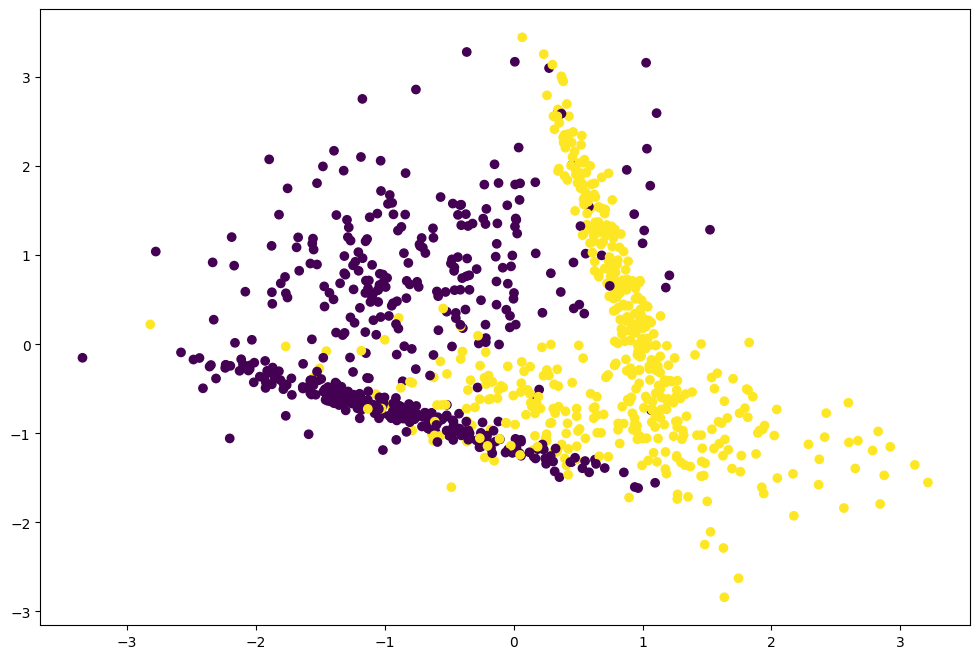

In [15]:
plt.figure(figsize=(12, 8))

plt.scatter(x[:, 0], x[:, 1], c=y)

Splitting the dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

test_size =  
* If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
* If int, represents the absolute number of test samples.
* If None, the value is set to the complement of the train size.
* If train_size is also None, it will be set to 0.25.

In our case, we took 20% of the dataset for testing.

## k = 1 (minimum value)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(x_train, y_train)

predict1 = knn1.predict(x_test)

The base object, implements a fit method to learn from data, either:
* estimator = estimator.fit(data, targets)
* estimator = estimator.fit(data)

For supervised learning, or some unsupervised problems, implements:
* prediction = predictor.predict(data)

Classification algorithms usually also offer a way to quantify certainty of a prediction, either using decision_function or predict_proba:

* probability = predictor.predict_proba(data)

[ScikitLearn Documentation](https://scikit-learn.org/stable/developers/develop.html)

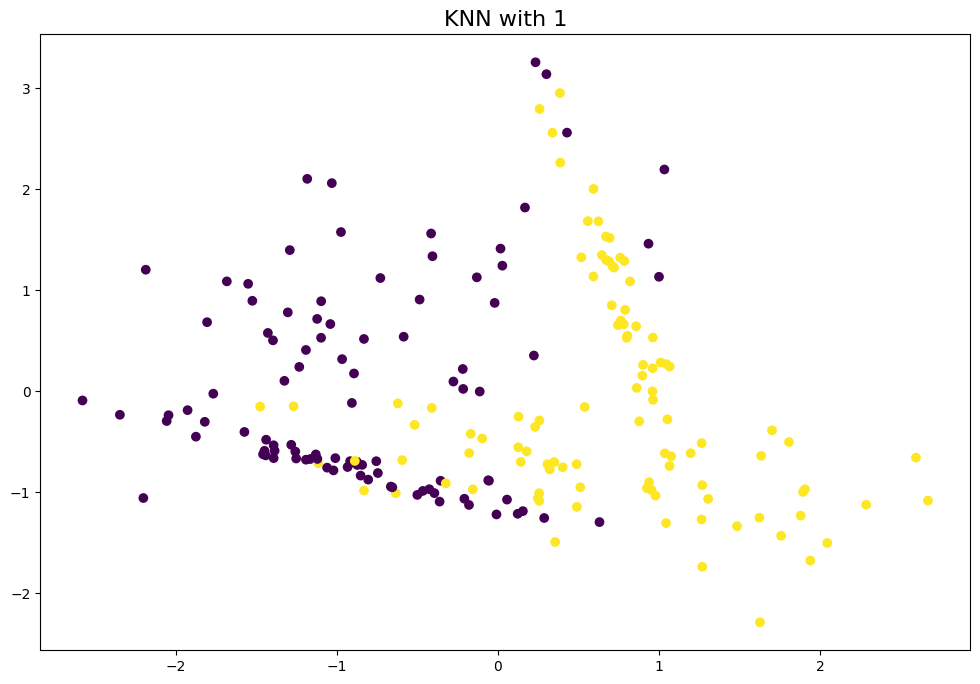

In [20]:
plt.figure(figsize=(12, 8))
plt.title("KNN with 1", fontsize=16)
plt.scatter(x_test[:,0], x_test[:, 1], c=predict1)

This is an overfit model which is sensitive to slight changes in the value of data points. So a little change in the data points can bring big changes in the prediction.

If the K is too small, it leads to overfitting

## k = 50 (large value)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn50 = KNeighborsClassifier(n_neighbors=50)

knn50.fit(x_train, y_train)

predict50 = knn50.predict(x_test)

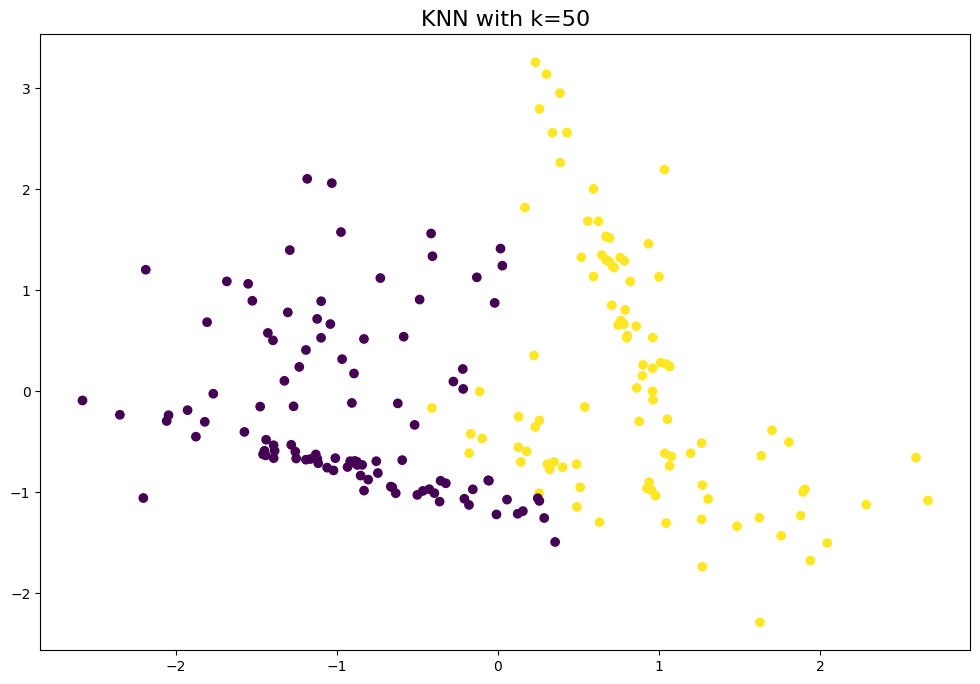

In [24]:
plt.figure(figsize=(12, 8))
plt.title("KNN with k=50", fontsize=16)
plt.scatter(x_test[:, 0], x_test[:, 1], c=predict50)

This is an underfit  model which is too general. It has poor performance on both train and test datasets.

If the K is too big, it leads to underfitting.

## k with an optimal value